In [1]:
from src.dists import compute_distortions_dists, S, compute_random_dists, norm_hamming, compute_distortions_dists_preloaded
from src.utils import load_images
from src import ops, search_metrics
from src.pdq_hash import pdq_hash

In [2]:
# магия для перезагрузки импортов
%load_ext autoreload
%autoreload 2
import builtins
from IPython.lib import deepreload
builtins.reload = deepreload.reload
%reload_ext autoreload

In [3]:
import imagehash
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn
import pdqhash
from PIL import Image

In [5]:
Lenna = Image.open("Lenna.png")

In [6]:
all_hashes = [imagehash.average_hash,
              imagehash.dhash,
              imagehash.phash,
              imagehash.whash,
              imagehash.colorhash,
              pdq_hash
              ]

In [34]:
images = load_images('test', 500)

In [23]:
distorted_images = {}

In [35]:
distorted_images['blur'] = ops.get_distortions(ops.gaussian_blur, [3, 7], images)

  0%|          | 0/501 [00:00<?, ?it/s]

100%|██████████| 501/501 [00:06<00:00, 77.01it/s]


In [37]:
distorted_images['scale'] = ops.get_distortions(ops.scale, [0.25, 0.5, 1.5], images)

100%|██████████| 501/501 [00:07<00:00, 63.95it/s]


In [38]:
distorted_images['jpeg'] = ops.get_distortions(ops.jpeg, [10, 20, 40], images)

100%|██████████| 501/501 [00:03<00:00, 158.74it/s]


In [39]:
distorted_images['mirror'] = ops.get_distortions(ops.flip, [0], images)

100%|██████████| 501/501 [00:00<00:00, 1324.72it/s]


In [40]:
distorted_images['flip'] = ops.get_distortions(ops.flip, [1], images)

100%|██████████| 501/501 [00:00<00:00, 976.88it/s] 


In [41]:
distorted_images['brighter'] = ops.get_distortions(ops.brighter, [0.5, 0.8, 1.5], images)

100%|██████████| 501/501 [00:01<00:00, 258.19it/s]


In [69]:
distorted_images['sharper'] = ops.get_distortions(ops.sharper, [0.5, 0.8, 1.5], images)

100%|██████████| 501/501 [00:04<00:00, 100.44it/s]


In [198]:
distorted_changed_images = {}

In [199]:
distorted_changed_images['rotate'] = ops.get_distortions(ops.rotate, [2, 5], images)

100%|██████████| 501/501 [00:01<00:00, 462.54it/s]


In [200]:
distorted_changed_images['crop'] = ops.get_distortions(ops.crop, [0.05, 0.1], images)

100%|██████████| 501/501 [00:00<00:00, 3119.05it/s]


In [46]:
def get_preloaded_res(images, distortion_res):
    res = {}
    for hash_func in all_hashes:
        res[hash_func.__name__] = compute_distortions_dists_preloaded(images, distortion_res=distortion_res, hash_func=hash_func)
    return res

In [47]:
gauss_blur_res = get_preloaded_res(images, distortion_res=distorted_images['blur'])

0it [00:00, ?it/s]

501it [00:00, 552.52it/s]
501it [00:00, 596.71it/s]
501it [00:00, 597.26it/s]
501it [00:00, 1175.56it/s]
501it [00:00, 1179.27it/s]
501it [00:00, 1185.09it/s]
501it [00:00, 981.46it/s] 
501it [00:00, 999.65it/s] 
501it [00:00, 963.10it/s]
501it [00:07, 70.56it/s]
501it [00:07, 71.53it/s]
501it [00:07, 70.56it/s]
501it [00:05, 89.66it/s] 
501it [00:05, 94.24it/s] 
501it [00:05, 95.77it/s] 
501it [00:04, 105.91it/s]
501it [00:04, 106.83it/s]
501it [00:04, 107.52it/s]


In [50]:
gauss_blur_res['average_hash'].stats()

{3: (0.0, 0.046875, 0.000499001996007984),
 7: (0.0, 0.078125, 0.0017153193612774451)}

<Axes: >

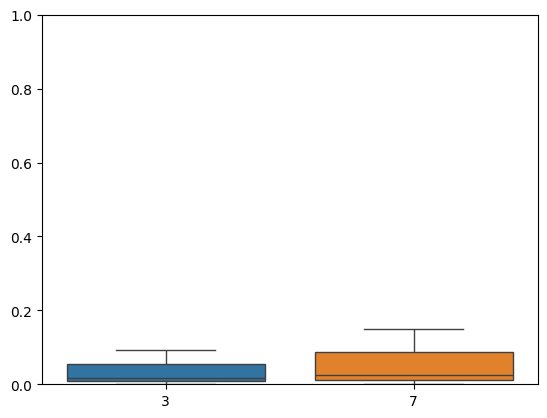

In [55]:
plt.ylim(0, 1)
seaborn.boxplot(gauss_blur_res['pdq_hash'].stats())

In [62]:
def save_dists_excel(res, filename='res'):
    rows = []
    for k in res['average_hash'].stats().keys():
        row = [k]
        for h in all_hashes:
            row += res[h.__name__].stats()[k]
        rows.append(row)
    pd.DataFrame(rows, columns=['param'] + ['min', 'max', 'avg'] * len(all_hashes)).to_excel(filename + '.xlsx', index=False)

In [63]:
save_dists_excel(gauss_blur_res, 'gbr')

In [64]:
scale_res = get_preloaded_res(images, distortion_res=distorted_images['scale'])
save_dists_excel(scale_res, 'scale')

501it [00:00, 609.11it/s]
501it [00:00, 7326.82it/s]
501it [00:00, 2204.89it/s]
501it [00:01, 270.00it/s]
501it [00:00, 1167.93it/s]
501it [00:00, 11530.53it/s]
501it [00:00, 3983.75it/s]
501it [00:00, 547.83it/s]
501it [00:00, 999.97it/s] 
501it [00:00, 7029.42it/s]
501it [00:00, 2506.34it/s]
501it [00:01, 488.98it/s]
501it [00:06, 71.62it/s]
501it [00:00, 969.08it/s] 
501it [00:01, 313.54it/s]
501it [00:22, 21.87it/s]
501it [00:05, 93.98it/s] 
501it [00:00, 1171.75it/s]
501it [00:01, 346.72it/s]
501it [00:12, 40.69it/s]
501it [00:04, 103.80it/s]
501it [00:00, 1786.59it/s]
501it [00:01, 481.21it/s]
501it [00:12, 39.49it/s]


In [65]:
jpeg_res = get_preloaded_res(images, distortion_res=distorted_images['jpeg'])
save_dists_excel(jpeg_res, 'jpeg')

501it [00:00, 688.73it/s] 
501it [00:02, 241.28it/s]
501it [00:02, 231.84it/s]
501it [00:02, 223.13it/s]
501it [00:00, 982.24it/s] 
501it [00:00, 610.33it/s]
501it [00:00, 597.98it/s]
501it [00:00, 575.85it/s]
501it [00:00, 537.09it/s]
501it [00:00, 787.65it/s]
501it [00:00, 876.46it/s]
501it [00:00, 924.79it/s]
501it [00:07, 71.55it/s]
501it [00:07, 71.32it/s]
501it [00:07, 70.20it/s]
501it [00:07, 69.60it/s]
501it [00:05, 92.61it/s] 
501it [00:04, 111.03it/s]
501it [00:05, 99.93it/s] 
501it [00:05, 96.00it/s] 
501it [00:04, 102.21it/s]
501it [00:04, 103.92it/s]
501it [00:04, 103.54it/s]
501it [00:04, 102.13it/s]


In [66]:
mirror_res = get_preloaded_res(images, distortion_res=distorted_images['mirror'])
save_dists_excel(mirror_res, 'mirror')

501it [00:00, 610.06it/s]
501it [00:00, 622.73it/s]
501it [00:00, 1185.72it/s]
501it [00:00, 1180.26it/s]
501it [00:00, 991.23it/s] 
501it [00:00, 989.88it/s] 
501it [00:07, 70.16it/s]
501it [00:07, 71.23it/s]
501it [00:05, 96.95it/s] 
501it [00:05, 96.11it/s] 
501it [00:04, 102.83it/s]
501it [00:04, 103.04it/s]


In [68]:
brighter_res = get_preloaded_res(images, distortion_res=distorted_images['brighter'])
save_dists_excel(brighter_res, 'brighter')

501it [00:00, 1149.29it/s]
501it [00:00, 641.54it/s]
501it [00:00, 584.74it/s]
501it [00:00, 550.79it/s]
501it [00:00, 583.62it/s]
501it [00:00, 1066.98it/s]
501it [00:00, 1183.74it/s]
501it [00:00, 1185.25it/s]
501it [00:00, 983.87it/s] 
501it [00:00, 984.38it/s] 
501it [00:00, 989.83it/s] 
501it [00:00, 987.62it/s] 
501it [00:07, 71.52it/s]
501it [00:07, 70.11it/s]
501it [00:07, 70.23it/s]
501it [00:07, 70.98it/s]
501it [00:05, 95.90it/s] 
501it [00:05, 99.55it/s] 
501it [00:05, 94.34it/s] 
501it [00:05, 98.66it/s] 
501it [00:05, 97.25it/s] 
501it [00:04, 101.67it/s]
501it [00:04, 106.92it/s]
501it [00:04, 108.94it/s]


In [70]:
sharper_res = get_preloaded_res(images, distortion_res=distorted_images['sharper'])
save_dists_excel(sharper_res, 'sharper')

501it [00:00, 1155.12it/s]
501it [00:00, 714.85it/s]
501it [00:00, 672.05it/s]
501it [00:00, 667.10it/s]
501it [00:00, 564.93it/s]
501it [00:00, 853.38it/s]
501it [00:00, 904.72it/s]
501it [00:00, 975.73it/s]
501it [00:00, 972.97it/s] 
501it [00:00, 917.47it/s]
501it [00:00, 992.03it/s] 
501it [00:00, 995.79it/s] 
501it [00:07, 71.51it/s]
501it [00:06, 71.68it/s]
501it [00:07, 70.39it/s]
501it [00:07, 69.84it/s]
501it [00:05, 90.73it/s] 
501it [00:05, 94.52it/s] 
501it [00:05, 91.91it/s] 
501it [00:05, 88.93it/s] 
501it [00:04, 104.64it/s]
501it [00:04, 102.43it/s]
501it [00:04, 103.48it/s]
501it [00:04, 104.11it/s]


In [67]:
flip_res = get_preloaded_res(images, distortion_res=distorted_images['flip'])
save_dists_excel(flip_res, 'flip')

501it [00:00, 963.94it/s]
501it [00:00, 630.02it/s]
501it [00:00, 1122.48it/s]
501it [00:00, 1176.25it/s]
501it [00:00, 992.86it/s] 
501it [00:00, 999.64it/s] 
501it [00:07, 71.34it/s]
501it [00:06, 71.72it/s]
501it [00:05, 95.97it/s] 
501it [00:05, 95.87it/s] 
501it [00:04, 103.84it/s]
501it [00:04, 104.36it/s]


In [ ]:
jpeg_res = get_preloaded_res(images, distortion_res=distorted_images['jpeg'])
save_dists_excel(jpeg_res, 'jpeg')

In [201]:
rotate_res = get_preloaded_res(images, distortion_res=distorted_changed_images['rotate'])
save_dists_excel(rotate_res, 'rotate')

501it [00:00, 1114.89it/s]
501it [00:00, 1229.89it/s]
501it [00:00, 1437.09it/s]
501it [00:00, 1149.77it/s]
501it [00:00, 1260.98it/s]
501it [00:00, 1474.59it/s]
501it [00:00, 999.00it/s] 
501it [00:00, 1078.45it/s]
501it [00:00, 1195.46it/s]
501it [00:07, 69.58it/s]
501it [00:06, 74.77it/s]
501it [00:05, 88.98it/s] 
501it [00:05, 98.56it/s] 
501it [00:04, 106.67it/s]
501it [00:04, 122.14it/s]
501it [00:04, 108.91it/s]
501it [00:04, 119.29it/s]
501it [00:03, 140.34it/s]


In [204]:
crop_res = get_preloaded_res(images, distortion_res=distorted_changed_images['crop'])
save_dists_excel(crop_res, 'crop')

501it [00:00, 1110.48it/s]
501it [00:00, 853.18it/s] 
501it [00:00, 929.73it/s] 
501it [00:00, 975.24it/s] 
501it [00:00, 1414.89it/s]
501it [00:00, 1774.14it/s]
501it [00:00, 998.91it/s] 
501it [00:00, 1179.04it/s]
501it [00:00, 1419.63it/s]
501it [00:06, 71.94it/s]
501it [00:05, 85.84it/s] 
501it [00:04, 100.48it/s]
501it [00:05, 97.25it/s] 
501it [00:04, 119.47it/s]
501it [00:03, 147.42it/s]
501it [00:04, 108.66it/s]
501it [00:03, 133.40it/s]
501it [00:02, 169.75it/s]


In [149]:
def get_res(distortion_funcs, limit: int | None = None, dataset_path: str = 'test'):
    res: dict[str, S] = {}
    for hash_func in all_hashes:
        res[hash_func.__name__] = compute_distortions_dists(images,
                                                            distortion_funcs=distortion_funcs,
                                                            hash_func=hash_func,
                                                            limit=limit)
    return res

<Axes: >

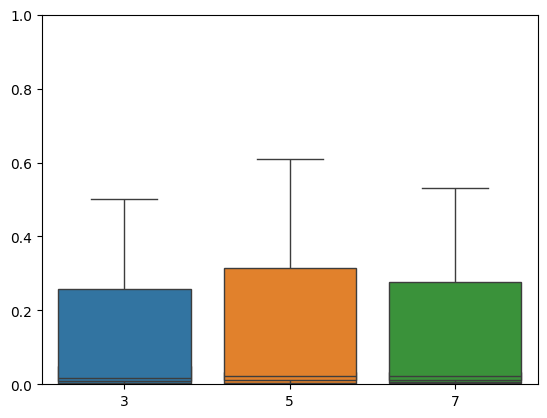

In [ ]:
plt.ylim(0, 1)
seaborn.boxplot(gauss_blur_res['phash'].stats())
seaborn.boxplot(gauss_blur_res['whash'].stats())

In [155]:
for h in all_hashes:
    dists = compute_random_dists(gauss_blur_res[h.__name__].orig_hashes, num=500)
    mu, std = norm.fit(dists) 
    print(h.__name__, round(np.median(dists), 3), round(mu, 3), round(std, 3))

average_hash 0.453 0.455 0.136
dhash 0.484 0.486 0.087
phash 0.5 0.484 0.071
whash 0.469 0.459 0.135
colorhash 0.143 0.147 0.056
pdq_hash 0.5 0.498 0.039


In [119]:
def hist_with_normal(random_dists: np.ndarray, bins=30, hash_name: str | None = None):
    h = np.sort(random_dists)

    if hash_name:
        plt.title(f'{hash_name} random dist')
    plt.xlim(0, 1)
    plt.hist(random_dists, bins=bins, density=True)
    x = np.linspace(0, 1, 1000)
    plt.plot(h, stats.norm.pdf(x, np.mean(x), np.std(x)))
    plt.show()

Fit Values: 0.50 and 0.04


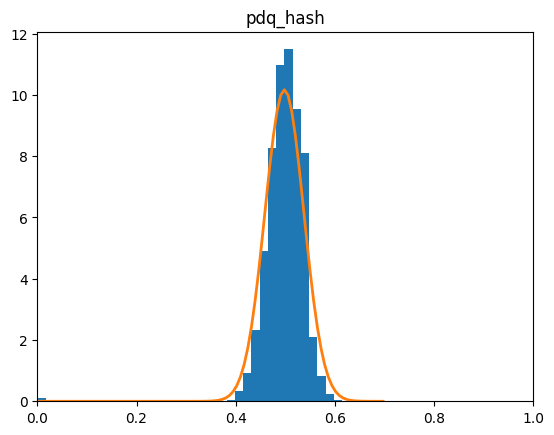

In [148]:
from scipy.stats import norm
 
data = compute_random_dists(gauss_blur_res['pdq_hash'].orig_hashes, num=500)
mu, std = norm.fit(data) 
 
plt.hist(data, bins=40, density=True,)
 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.xlim(0, 1)
plt.plot(x, p, linewidth=2)
print("Fit Values: {:.2f} and {:.2f}".format(mu, std))
plt.title('pdq_hash')
 
plt.show()

<Axes: title={'center': 'bright 0.1)'}>

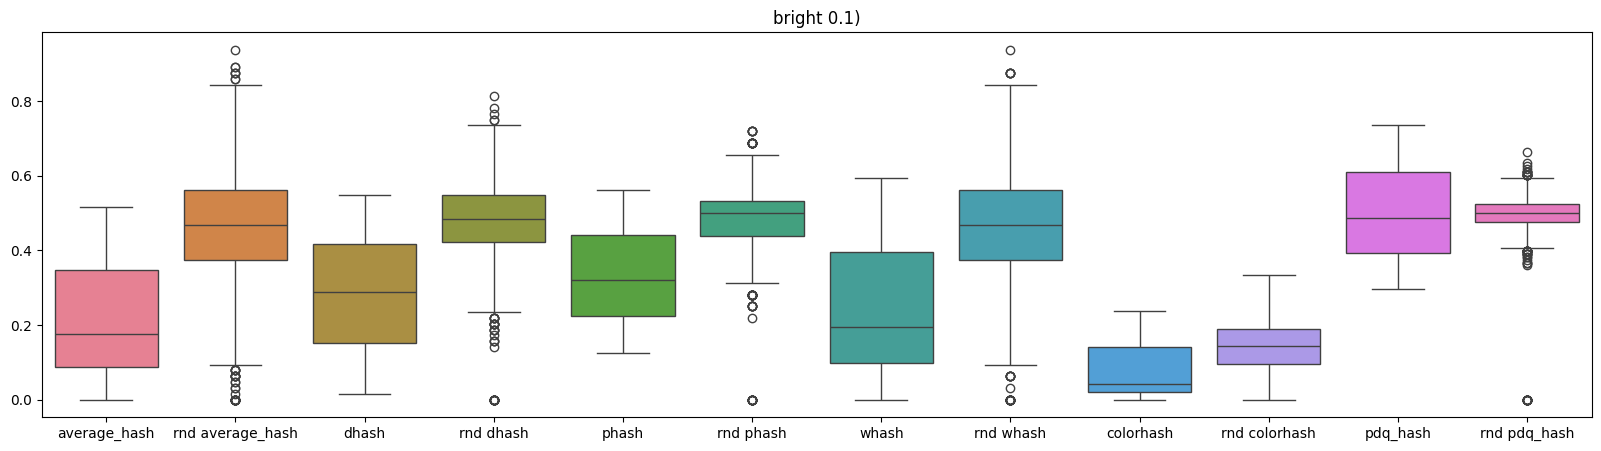

In [207]:
PARAM = 0.1
res = crop_res
plt.figure(figsize=(20, 5))
plt.title(f'bright {PARAM})')
q = {}
for h in all_hashes:
    q[h.__name__] = res[h.__name__].stats()[PARAM]
    q[f'rnd {h.__name__}'] = compute_random_dists(res[h.__name__].orig_hashes)
seaborn.boxplot(q)

In [265]:
mirror_res['pdq_hash'].stats()

{0: (0.1953125, 0.546875, 0.49700598802395207)}

In [266]:
search_metrics.train_T(hash_name='pdq_hash',
                       res=mirror_res,
                       train_size=500,
                       from_t=0.02,
                       to_t=0.2)

T=0.02: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.04: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.06: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.08: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.1: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.12: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.14: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.16: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.18: precision=1.0, recall=0.5, f1=0.6666666666666681
T=0.2: precision=1.0, recall=0.501, f1=0.6673333333333348


In [291]:
search_metrics.train_T_all_res(hash_name='pdq_hash',
                               res_list=[crop_res, rotate_res],
                               train_size=500,
                               from_t=0.2,
                               to_t=0.4)

T=0.2: precision=1.0, recall=0.42533333333333445, f1=0.5827999999999998
T=0.222222: precision=0.9981666666666666, recall=0.46100000000000346, f1=0.6144666666666647
T=0.244444: precision=0.9981666666666666, recall=0.4863333333333383, f1=0.6369666666666636
T=0.266667: precision=0.9981666666666666, recall=0.5103333333333397, f1=0.6582666666666623
T=0.288889: precision=0.9974999999999998, recall=0.5246666666666727, f1=0.6699714285714239
T=0.311111: precision=0.9936, recall=0.5486666666666716, f1=0.6893357142857086
T=0.333333: precision=0.9856499999999996, recall=0.5793333333333364, f1=0.7123999999999937
T=0.355556: precision=0.9765999999999996, recall=0.6173333333333336, f1=0.7395753968253903
T=0.377778: precision=0.8809535714285697, recall=0.661999999999998, f1=0.7336884559884517
T=0.4: precision=0.5133051212676216, recall=0.7089999999999976, f1=0.5678308685122935


## песочница

<Axes: >

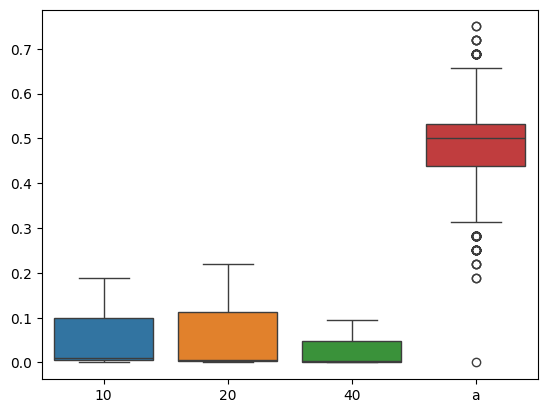

In [ ]:
seaborn.boxplot({**jpeg_res['phash'].stats(), 'a': compute_random_dists(jpeg_res['phash'].orig_hashes)})

In [ ]:
save_dists_excel((mf_res := get_res(ops.distortion_factory(ops.median_filter, [9]), limit=2000)), 'mf')

2000it [00:11, 179.31it/s]
2000it [02:05, 15.98it/s]
2000it [00:10, 197.95it/s]
2000it [02:05, 15.93it/s]
2000it [00:10, 193.70it/s]
2000it [02:06, 15.86it/s]
2000it [00:38, 51.49it/s]
2000it [02:33, 13.01it/s]


In [ ]:
mf_res['phash'].stats()

{9: (0.0, 0.1875, 0.015984375)}

<Axes: >

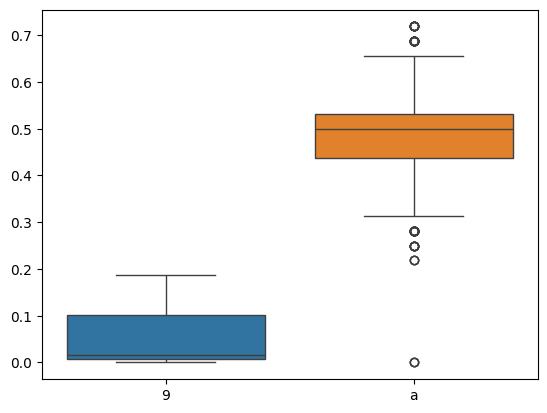

In [ ]:
seaborn.boxplot({**mf_res['phash'].stats(), 'a': compute_random_dists(mf_res['phash'].orig_hashes, 100)})


<Axes: >

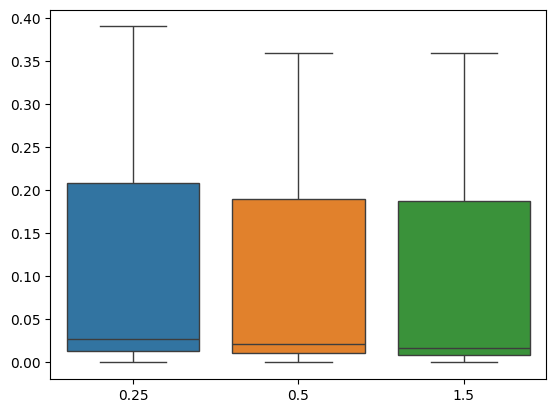

In [ ]:
# plt.ylim(0, 1)
seaborn.boxplot(scale_res['whash'].stats())
# seaborn.boxplot(scale_res['whash'].stats())

In [ ]:
sp_noise_res['phash'].stats()

{0.1: (0.0, 0.15625, 0.013625), 0.2: (0.0, 0.28125, 0.0206875)}

In [ ]:
crop_res['dhash'].stats()

{0.02: (0.0, 0.171875, 0.062125),
 0.05: (0.0, 0.328125, 0.15153125),
 0.1: (0.015625, 0.546875, 0.2869375)}

<Axes: >

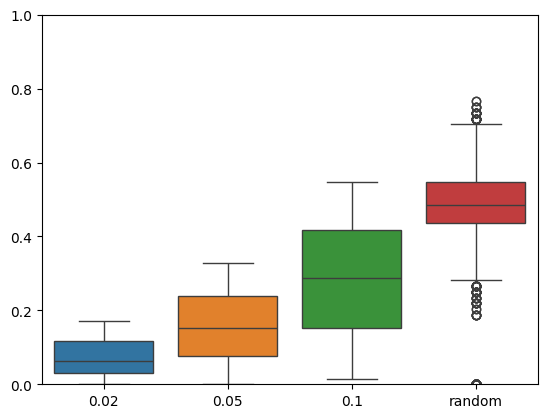

In [ ]:
plt.ylim(0, 1)
seaborn.boxplot({**crop_res['dhash'].stats(), 'random': compute_random_dists(flip_res['dhash'].orig_hashes, 100)})

In [ ]:
search_metrics.test_T(hash_name='phash',
                      res=jpeg_res,
                      T=0.09,
                      train_size=0)

5000


(0.9897866666666665, 0.99855, 0.9921593650793651)

In [ ]:
T=0.09
h = 'phash'
np.sum(np.array(jpeg_res[h].param2dist[10]) < T), sum(compute_random_dists(jpeg_res[h].orig_hashes) < T)

(4978, 3)

In [ ]:
mf_res['phash'].stats()

{9: (0.0, 0.125, 0.0159375)}

In [ ]:
search_metrics.train_T(hash_name='phash', 
                       res=mf_res, 
                       train_size=100,
                       from_t=0.01,
                       to_t=0.1)

T=0.01: precision=1.0, recall=0.805, f1=0.8700000000000003
T=0.02: precision=1.0, recall=0.805, f1=0.8700000000000003
T=0.03: precision=1.0, recall=0.805, f1=0.8700000000000003
T=0.04: precision=1.0, recall=0.975, f1=0.9833333333333334
T=0.05: precision=1.0, recall=0.975, f1=0.9833333333333334
T=0.06: precision=1.0, recall=0.975, f1=0.9833333333333334
T=0.07: precision=1.0, recall=1.0, f1=1.0
T=0.08: precision=1.0, recall=1.0, f1=1.0
T=0.09: precision=1.0, recall=1.0, f1=1.0
T=0.1: precision=1.0, recall=1.0, f1=1.0
